# Самостоятельная работа №1

In [2]:
import numpy as np
import cvxpy as cvx

## Задача 1
### Вариант №7 
#### Номер 1

In [6]:
# наши независимые переменные (x1...x5)
variable_count=5
x_1 = cvx.Variable(variable_count,nonneg=True)
#коэфициенты в уравнениях для независимых переменных
A_1 = np.array([[-2, 1,1,0,0],[4,3,0,-1,0], [8,-1,0,0,1]])

b_1 = np.array([2,16,16])

c_1 = np.array([3,-3,-1,4,0])
# ограничения
constraints_1 = [A_1[0] * x_1 == b_1[0],A_1[1] * x_1 == b_1[1],A_1[2] * x_1 == b_1[2]]
# целевая функция и что с ней делать
obj_1 = cvx.Maximize(c_1 * x_1)
# формулируем задачу и решаем
prob_1 = cvx.Problem(obj_1, constraints_1)
prob_1.solve(max_iter=10000000,verbose=True)

-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 5, constraints m = 8
          nnz(P) + nnz(A) = 14
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -3.9981e+01   1.60e+01   1.22e+04   1.00e-01   2.97e-03s
 200  -3.9732e+01   1.38e+00   2.81e-02   1.25e-02   3.55e-03s
 400  -6.6276e+01   6.96e-02   2.40e-01   3.67e

65.00000000000001

In [9]:
print(prob_1.status)
print(prob_1.value)
print(x_1.value)

optimal
65.00000000000001
[3.00000000e+00 8.00000000e+00 1.01985280e-20 2.00000000e+01
 3.43781479e-21]
20.000000000000004


#### Номер 2

In [58]:

# наши независимые переменные (x1...x4)
x = cvx.Variable(4,nonneg=True)
#коэфициенты в уравнениях для независимых переменных
A = np.array([[1, 3,7,-1],[1, -1,-1,3]])

b = np.array([6,2])

c = np.array([1,1,1,1])

# ограничения
constraints = [A * x == b]

# целевая функция и что с ней делать
obj = cvx.Maximize(c * x)

# формулируем задачу и решаем
prob = cvx.Problem(obj, constraints)
print(prob)
prob.solve(max_iter=10000000)


maximize [1. 1. 1. 1.] * var1590
subject to [[ 1.  3.  7. -1.]
 [ 1. -1. -1.  3.]] * var1590 == [6. 2.]


4.000000000000001

In [59]:
print(prob.status)
print(prob.value)
print(x.value)

optimal
4.000000000000001
[2.06027492e+00 1.46986254e+00 2.20004553e-23 4.69862539e-01]


#### Номер 3

In [68]:

# наши независимые переменные (x1 и x5)
x = cvx.Variable(2,nonneg=True)
#коэфициенты в уравнениях для независимых переменных
a = np.array([[2, -1],[2,1],[1, -1]])

b = np.array([2,4,-1])

c = np.array([1,3])

# ограничения
constraints = [a[0]*x <= b[0], a[1]*x >= b[1],a[2]*x <=b[2]]

# целевая функция и что с ней делать
obj = cvx.Minimize(c * x)

# формулируем задачу и решаем
prob = cvx.Problem(obj, constraints)
print(prob)
prob.solve(max_iter=10000000)


minimize [1. 3.] * var1904
subject to [ 2. -1.] * var1904 <= 2.0
           4.0 <= [2. 1.] * var1904
           [ 1. -1.] * var1904 <= -1.0


7.0

In [69]:
print(prob.status)
print(prob.value)
print(x.value)

optimal
7.0
[1. 2.]


In [71]:

# наши независимые переменные (x1...x5)
x = cvx.Variable(5,nonneg=True)
#коэфициенты в уравнениях для независимых переменных
a = np.array([[1, 2,0,-1,3],[0,1,1,2,-1]])

b = np.array([12,1])

c = np.array([1,6,3,0,4])

# ограничения
constraints = [a*x == b]

# целевая функция и что с ней делать
obj = cvx.Maximize(c * x)

# формулируем задачу и решаем
prob = cvx.Problem(obj, constraints)

prob.solve(max_iter=10000000)


maximize [1. 6. 3. 0. 4.] * var2003
subject to [[ 1.  2.  0. -1.  3.]
 [ 0.  1.  1.  2. -1.]] * var2003 == [12.  1.]


31.0

In [72]:
print(prob.status)
print(prob.value)
print(x.value)

optimal
31.0
[2.34610975e-23 4.78801437e-23 5.00000000e+00 0.00000000e+00
 4.00000000e+00]


### Задача 2
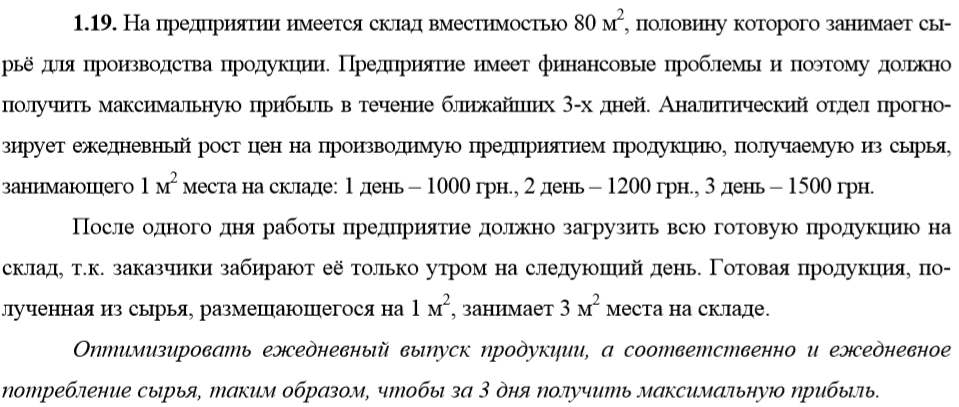

Для того, чтобы максимизировать прибыль, нам нужно преобразовать дано в систему линейных уравнений.

готовый продукт занимает в 3 раза больше, чем сырье

на сырье 40 м^2 , на готовые продукты 40 м^2

целевая функция 1000 * 3x1 + 1200 * 3x2 + 1500 * 3x3 -> max , где x[i] - кол-во сырья, отданного на производство за i'ый день

x[i] < 40
3*x[i] < 40

In [22]:
x=cvx.Variable(3,nonneg=True)

constraints= [x <=40, 3*x<=40]

c=[1000,1200,1500]
prob= cvx.Problem(cvx.Maximize(c*x),constraints)
print(prob)
prob.solve()

maximize [1000. 1200. 1500.] * var692
subject to var692 <= 40.0
           Promote(3.0, (3,)) * var692 <= 40.0


49333.333333333336

In [21]:
print(prob.status)
print(prob.value)
print(x.value)

optimal
49333.333333333336
[13.33333333 13.33333333 13.33333333]


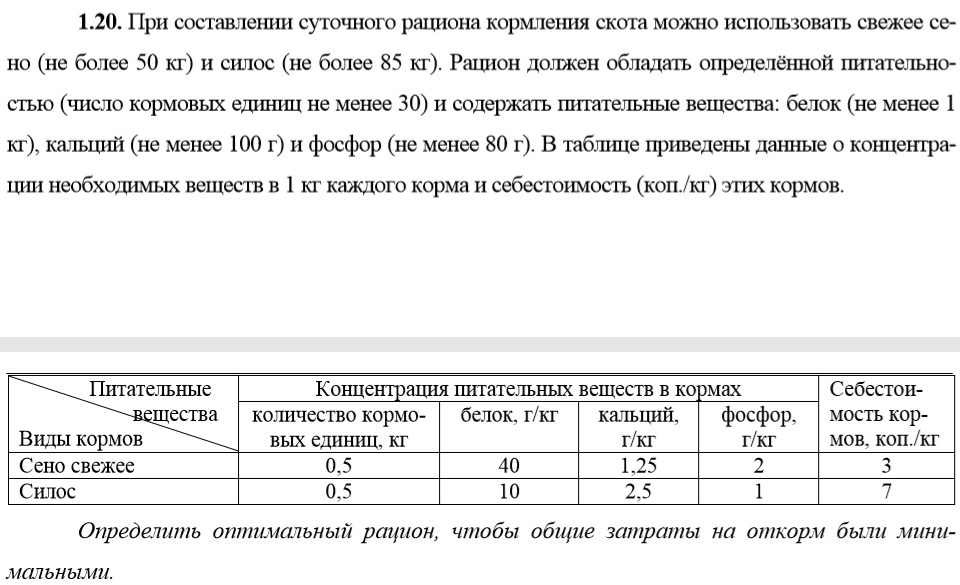

сено <= 50
cилос <= 80
корм. ед. <= 60 (т.к одна кормовая единица = 2 кг)

белок >= 1
кальций >= 0.1
фосфор >= 0.08

целевая функция стоймость(сено + силос) -> min

сено=x1
силос=x2
измеряется в кило

целевая функция 3x1 + 7x1 -> min

In [50]:
x = cvx.Variable(2,nonneg=True)
a = [[0.04,0.01],[0.00125,0.0025],[0.002,0.001]]
b = [1,0.1,0.08]
constraints = [a[0]*x>=b[0],a[1]*x>=b[1],a[2]*x>=b[2],x[0]+x[1] >=60,x[0] <= 50, x[1] <= 80]
problem=cvx.Problem(cvx.Minimize(3*x[0]+7*x[1]),constraints)
problem.solve()

255.0

In [52]:
print(problem.status)
print(problem.value)
print(x.value)

optimal
255.0
[50. 15.]


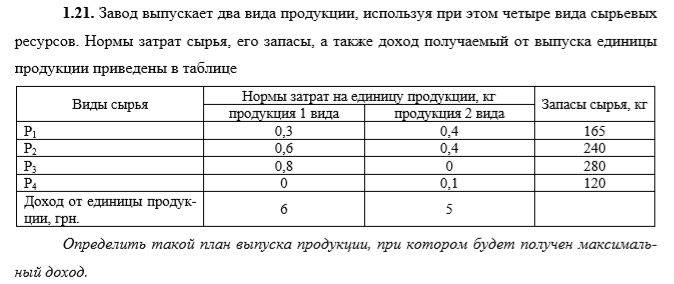

In [55]:
x = cvx.Variable(2,nonneg=True)
a = [[0.3,0.4],[0.6,0.4],[0.8,0],[0,0.1]]
b = [165,240,280,120]
constraints = [a[0]*x<=b[0],a[1]*x<=b[1],a[2]*x<=b[2],a[3]*x<=b[3]]
problem=cvx.Problem(cvx.Maximize(6*x[0]+5*x[1]),constraints)
problem.solve()

2624.999999999999

In [56]:
print(problem.status)
print(problem.value)
print(x.value)

optimal
2624.999999999999
[250. 225.]


# Задача 3
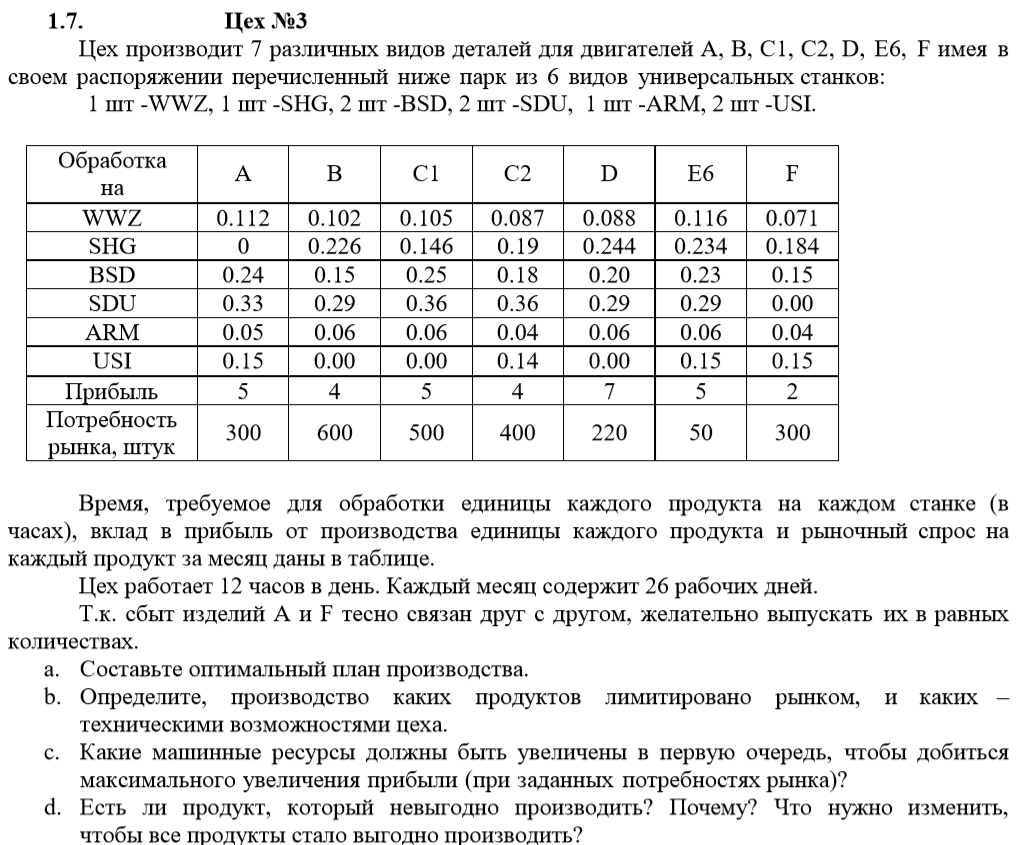

Ради интереса, решил выполнить последнее задание в Экселе, файл с решением прикладываю.

- a. См. Excel
- b. B ограничено возможностью цеха, остальные рынком.
- c. SDU, ARM.
- d. Все познается в сравнении? E6 поменять на B потенциально при неизменности рынка.